> `This notebook aims to use OpenCV python library for image processing, with the attempt to convert image to sketch.`

In [9]:
pip install opencv-python pillow

## Making the necessary imports

In [1]:
import cv2  # import openCV
import os # importing os for bash commands
from PIL import Image # importing Image module from PIL(Python Imaging Library)

In [2]:
img = Image.open("/content/drive/MyDrive/Exploring PIL, openCV/joker.jpg") 
#To load the image, we simply import the image module from the pillow and call the Image. open(), passing the image filename.

In [3]:
print(img.size)  # returns tuple representing image size in pixel

(236, 353)


## Read the picture

In [4]:
img1 = cv2.imread('/content/drive/MyDrive/Exploring PIL, openCV/joker.jpg')  # This command can be used to read image and stores it as img1


## Displaying image using matplotlib

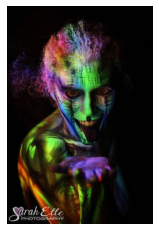

In [12]:
import matplotlib.pyplot as plt    # showing the image using pyplot module of matplotlib
plt.imshow(img1)
plt.axis(False)
plt.show()

## Converting image to sketch
1. convert `img1` to grey image as `grayed`
2. Invert the `grayed` image
3. Blur the `inverted` image
4. Invert the `blurred` image
5. Finally the sketch can be obtained by bitwise division between the `grayed` image and the `inverted-blurred` image

In [5]:
grayed = cv2.cvtColor(img1 , cv2.COLOR_BGR2GRAY)   # convert img1 to a grey image using cvtColor function of OpenCV
inverted = cv2.bitwise_not(grayed)               # Inverting the image
blurred = cv2.GaussianBlur(inverted, (19,19), sigmaX=0, sigmaY=0)      # Apply Gaussian blur to the image. the second argument to the function is the kernel size 

`Note` : Larger the kernel size (which shouls always be a pair to odd numbers), the more blurred the image will be. 

In [6]:
def blend(x,y):   # 
  return cv2.divide(x, 255-y,scale=256)   # this line makes the blurred image from previous cell invert

The `blend` function firsts inverts back the `blurred` image as well as performs the bitwise division of grayed and the inverted blurred image.

Thus, it is clear that there are two ways of inversion:
1. using `bitwise_not()` method
2. analytically as 255-original_image

In [7]:
final = blend(grayed, blurred)

## Saving the final image as `my_artwork.jpg`

In [8]:
cv2.imwrite("my_artwork.jpg", final)

True

## Reading and displaying the sketch generated

In [13]:
sketch1 = cv2.imread('/content/my_artwork.jpg')

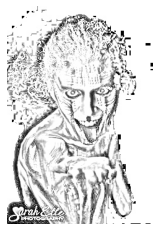

In [14]:
plt.imshow(sketch1)
plt.axis(False)
plt.show()